In [1]:
import pandas as pd
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
traindata = r'C:\Users\farha\Downloads\Data (1).csv'
df = pd.read_csv(traindata)

In [3]:
df

,Cost,Quality,Lead time,Service Level,Availability,Green Packing aqnd Labeling,Selected Supplier
0,18.00,0.99,8,0.96,0.95,0,1
1,18.43,1.00,9,0.98,0.91,0,1
2,19.87,0.94,10,0.93,0.96,1,0
3,17.25,0.99,7,0.97,0.89,0,1
4,18.22,1.00,9,0.94,0.88,1,0
...,...,...,...,...,...,...,...
61,20.85,0.91,11,0.94,0.95,0,1
62,18.10,0.98,10,0.99,0.93,1,0
63,21.20,0.91,12,0.90,0.94,1,0
64,22.12,0.90,11,0.89,0.92,0,0


In [4]:
print(df.shape)      # To get (Number of Rows, Number of Columns) of a data frame we use DataFrame.shape 

(66, 7)


In [5]:
df.describe()

,Cost,Quality,Lead time,Service Level,Availability,Green Packing aqnd Labeling,Selected Supplier
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,20.699697,0.935606,10.484848,0.921515,0.921667,0.575758,0.257576
std,2.058624,0.036548,1.315498,0.036215,0.035802,0.498015,0.440650
min,17.250000,0.870000,7.000000,0.850000,0.810000,0.000000,0.000000
25%,18.940000,0.910000,10.000000,0.900000,0.890000,0.000000,0.000000
50%,20.925000,0.925000,11.000000,0.910000,0.930000,1.000000,0.000000
75%,22.500000,0.980000,11.000000,0.950000,0.950000,1.000000,0.750000
max,24.000000,1.000000,15.000000,0.990000,0.970000,1.000000,1.000000


In [6]:
TrainCols = list(df.columns.values)
print(TrainCols)

['Cost', 'Quality ', 'Lead time ', 'Service Level', 'Availability', 'Green Packing aqnd Labeling', 'Selected Supplier']


In [9]:
X = df[TrainCols[0:len(TrainCols)-1]].copy()
Y = df[['Selected Supplier']].copy()
print(X.shape)
print(Y.shape)


(66, 6)
(66, 1)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [11]:
# Data standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit only on X_train
scaler.fit(X_train)

# Scale both X_train and X_test
X1train = scaler.transform(X_train)
X1test = scaler.transform(X_test)

In [12]:
Columns_name=df.columns.values
xColumns_name=Columns_name[0:len(TrainCols)-1]
scaled_df=pd.DataFrame(X1train, columns = xColumns_name) 
scaled_df_test=pd.DataFrame(X1test, columns = xColumns_name) 
print(scaled_df.shape)

(52, 6)


# Decision Tree

In [13]:
dt = DecisionTreeClassifier(max_depth=4, criterion='gini')
dt.fit(scaled_df, y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.5, 0.9, 'X[1] <= 0.767\ngini = 0.393\nsamples = 52\nvalue = [38, 14]'),
 Text(0.2, 0.7, 'X[3] <= 0.271\ngini = 0.053\nsamples = 37\nvalue = [36, 1]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(0.3, 0.5, 'X[1] <= -0.668\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.8, 0.7, 'X[3] <= 1.682\ngini = 0.231\nsamples = 15\nvalue = [2, 13]'),
 Text(0.7, 0.5, 'X[0] <= -0.528\ngini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.8, 0.3, 'X[3] <= 0.554\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

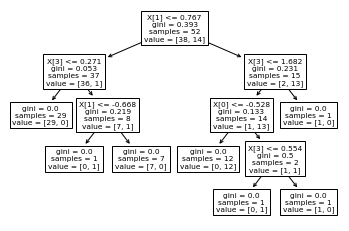

In [15]:
from sklearn import tree
tree.plot_tree(dt)

In [16]:
X_Pred = dt.predict(scaled_df_test)
X1_Pred = dt.predict(scaled_df)
print("Train Accuracy:", metrics.accuracy_score(y_train,X1_Pred))
print("Test Accuracy:", metrics.accuracy_score(y_test,X_Pred))

Train Accuracy: 1.0
Test Accuracy: 0.9285714285714286


In [17]:
X_Pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

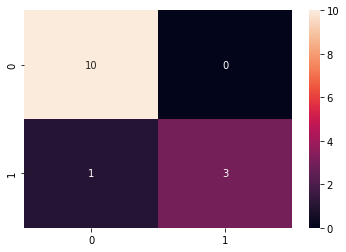

In [18]:
cm=confusion_matrix(X_Pred, y_test)
cm
sns.heatmap(cm, annot=True); 

In [19]:
print(classification_report(X_Pred, y_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.75      0.86         4

    accuracy                           0.93        14
   macro avg       0.95      0.88      0.90        14
weighted avg       0.94      0.93      0.93        14



# Logestic Regression

In [20]:
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression() 

In [21]:
Columns_name=df.columns.values
xColumns_name=Columns_name[0:len(TrainCols)-1]
scaled_df1=pd.DataFrame(X1train, columns = xColumns_name) 
scaled_df_test1=pd.DataFrame(X1test, columns = xColumns_name) 
print(scaled_df1.shape)

(52, 6)


In [22]:
model.fit(scaled_df1, y_train) 

C:\Users\farha\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [23]:
X_Pred = model.predict(scaled_df_test1)
X1_Pred = model.predict(scaled_df1)
print("Train Accuracy:", metrics.accuracy_score(y_train,X1_Pred))
print("Test Accuracy:", metrics.accuracy_score(y_test,X_Pred))

Train Accuracy: 0.9230769230769231
Test Accuracy: 0.8571428571428571


In [24]:
X_Pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

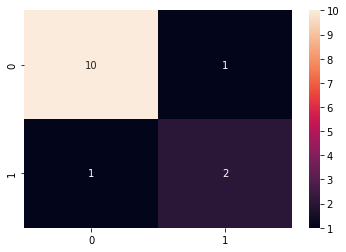

In [25]:
cm=confusion_matrix(X_Pred, y_test)
cm
sns.heatmap(cm, annot=True); 

In [26]:
print(classification_report(X_Pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.67      0.67      0.67         3

    accuracy                           0.86        14
   macro avg       0.79      0.79      0.79        14
weighted avg       0.86      0.86      0.86        14



# Random Forest

In [27]:
Columns_name=df.columns.values
xColumns_name=Columns_name[0:len(TrainCols)-1]
scaled_df2=pd.DataFrame(X1train, columns = xColumns_name) 
scaled_df_test2=pd.DataFrame(X1test, columns = xColumns_name) 
print(scaled_df2.shape)

(52, 6)


In [28]:
rf = RandomForestClassifier(n_estimators= 100)
rf.fit(scaled_df2, y_train) 

C:\Users\farha\AppData\Local\Temp\ipykernel_20232\2264505670.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(scaled_df2, y_train)


RandomForestClassifier()

In [29]:
X_Pred = rf.predict(scaled_df_test2)
X1_Pred = rf.predict(scaled_df2)
print("Train Accuracy:", metrics.accuracy_score(y_train,X1_Pred))
print("Test Accuracy:", metrics.accuracy_score(y_test,X_Pred))

Train Accuracy: 1.0
Test Accuracy: 0.9285714285714286


In [30]:
X_Pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

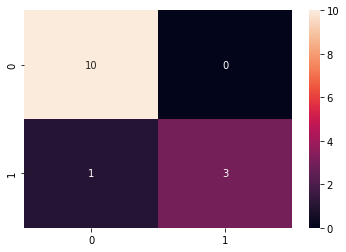

In [31]:
cm=confusion_matrix(X_Pred, y_test)
cm
sns.heatmap(cm, annot=True); 

In [32]:
print(classification_report(X_Pred, y_test))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.75      0.86         4

    accuracy                           0.93        14
   macro avg       0.95      0.88      0.90        14
weighted avg       0.94      0.93      0.93        14



# ROC

C:\Users\farha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\farha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\farha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be r

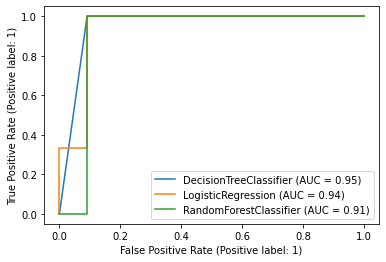

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve, roc_curve, auc

disp=plot_roc_curve(dt, scaled_df_test, y_test)
plot_roc_curve(model, scaled_df_test1, y_test, ax=disp.ax_)
plot_roc_curve(rf, scaled_df_test2, y_test, ax=disp.ax_)

#plt.plot([0,1], [0,1], color='orange', linestyle='--');

In [34]:
I=rf.feature_importances_ 
I

array([0.26759395, 0.41268867, 0.08052496, 0.15427324, 0.06062083,
       0.02429835])

In [35]:
df1=pd.DataFrame({ 
    "Importance": [0.29870599, 0.36251142, 0.13812889, 0.14425585, 0.04142397,
       0.01497387], 
    "Feature": ['Cost', 'Quality ', 'Lead time ', 'Service Level', 'Availability', 'Green Packing aqnd Labeling'] }) 

In [36]:
df1

,Importance,Feature
0,0.298706,Cost
1,0.362511,Quality
2,0.138129,Lead time
3,0.144256,Service Level
4,0.041424,Availability
5,0.014974,Green Packing aqnd Labeling


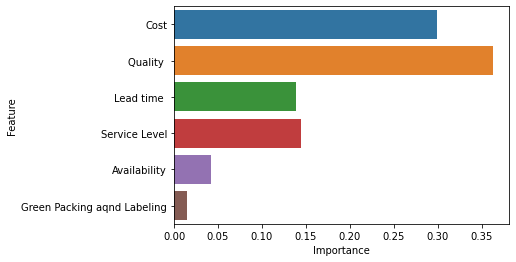

In [37]:
sns.barplot(data=df1, y="Feature", x="Importance"); 